# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [74]:
data = pd.read_csv("../inisiasi_df.csv")
data.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL,Cluster
0,Abrasi Air Laut,0,2012,1.0,0.0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...,0.0
1,AIDS,1,2000,1.0,47.0,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,0.0
2,AIDS,1,2001,1.0,99.0,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,0.0
3,AIDS,1,2002,1.0,100.0,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,0.0
4,AIDS,1,2003,5.0,261.0,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,0.0


In [75]:
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cause            1059 non-null   object 
 1   Type             1059 non-null   int64  
 2   Year             1059 non-null   int64  
 3   Data Redundancy  1056 non-null   float64
 4   Total Deaths     1056 non-null   float64
 5   Source           1059 non-null   object 
 6   Page at Source   1059 non-null   object 
 7   Source URL       1059 non-null   object 
 8   Cluster          1056 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 74.6+ KB


In [76]:
print("\nMissing values per fitur:")
print(data.isnull().sum())
print("------------------------------------------------------")
data.dropna(inplace=True)
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
Cause              0
Type               0
Year               0
Data Redundancy    3
Total Deaths       3
Source             0
Page at Source     0
Source URL         0
Cluster            3
dtype: int64
------------------------------------------------------

Missing values per fitur:
Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     0
Source URL         0
Cluster            0
dtype: int64


In [77]:
label_encoder = LabelEncoder()
data["Cause"] = label_encoder.fit_transform(data["Cause"])

data.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL,Cluster
0,1,0,2012,1.0,0.0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...,0.0
1,0,1,2000,1.0,47.0,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,0.0
2,0,1,2001,1.0,99.0,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,0.0
3,0,1,2002,1.0,100.0,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,0.0
4,0,1,2003,5.0,261.0,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,0.0


In [78]:
data = data.drop(columns=['Source', 'Page at Source', 'Source URL'])
data.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Cluster
0,1,0,2012,1.0,0.0,0.0
1,0,1,2000,1.0,47.0,0.0
2,0,1,2001,1.0,99.0,0.0
3,0,1,2002,1.0,100.0,0.0
4,0,1,2003,5.0,261.0,0.0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [80]:
scaler = MinMaxScaler()
numeric_columns = data.drop(columns=['Cluster']).select_dtypes(include=['int64', 'float64']).columns 
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


X = data.drop(columns=['Cluster'])  
y = data['Cluster'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(844, 5), y_train=(844,)
Test set shape: X_test=(212, 5), y_test=(212,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [81]:
rf = RandomForestClassifier().fit(X_train, y_train)
print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [82]:
# 1
y_pred = rf.predict(X_test)

In [84]:
# 2
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' cocok untuk multi-class
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9953
F1-Score: 0.9931
Precision: 0.9914
Recall: 0.9953


c:\Users\acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


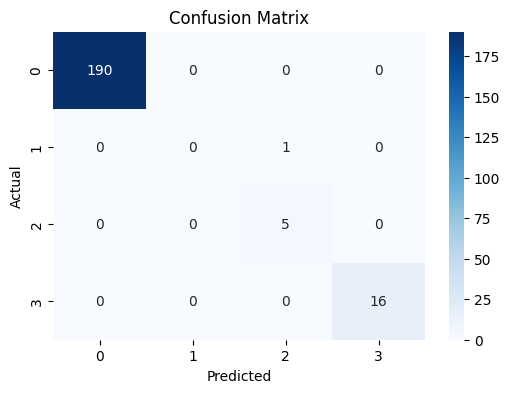

In [87]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

2. Identifikasi kelemahan model
- hanya ada satu False Positive yaitu ketika model memprdiksi kelas 1 padahal sebenarnya kelas 0 berarti model memiliki kemungkinan kecil untuk memberikan kesalahan dalam mendeteksi kategori tertentu
- jika model bekerja dengan data real time kemungkinan bisa jadi performanya berubah
- Kelas 1 memiliki performa yang buruk dengan 1 prediksi benar
- Kelas 2: model memprediksi 5 sampel sebagai kelas 2 tetapi mungkin ada beberapa yang seharusnya tidak masuk kategori ini
- sepertinya model terlalu mengandalkan data dari kelas dominan


3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
- menambahkan lebih banyak data minoritas
- melakukan exspolarasi fitur tambahan seperti usia atau kondisi kesehatan
- menangani data tidak seimbang dengan mengurangi undersampling pada kelas mayoritas, mengurangi jumlah sampel dari kelas mayoritas (kelas 0) agar model tidak hanya belajar dari kelas dominan

